### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


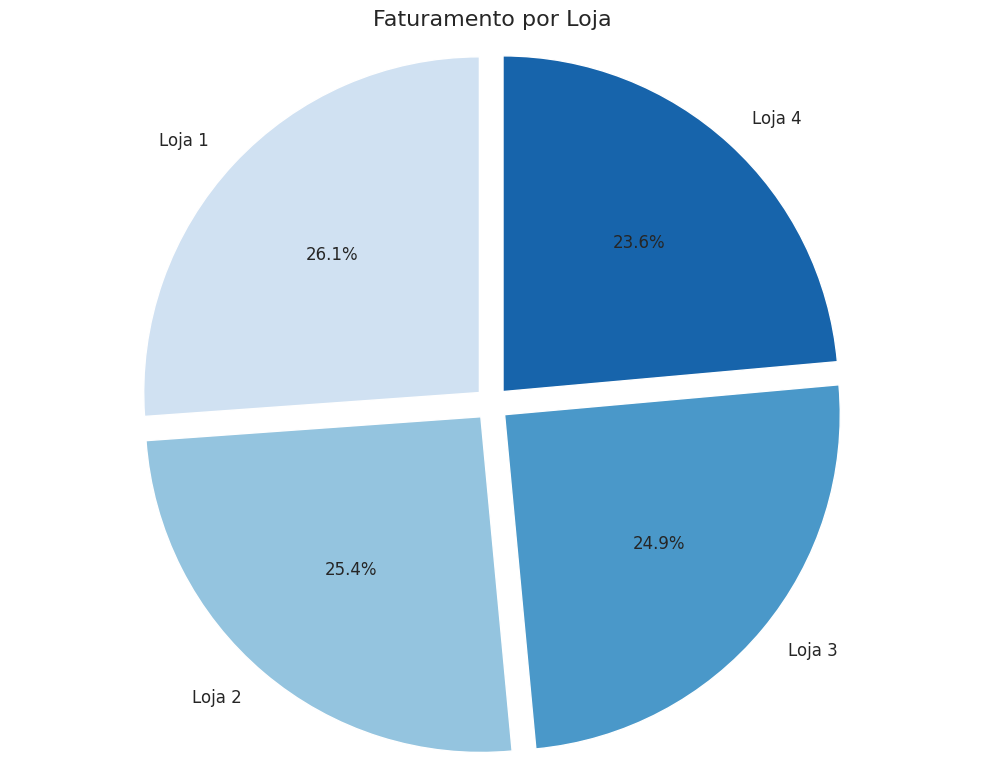


Faturamento total por loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}


lista_lojas = []
for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df["Loja"] = nome_loja
    lista_lojas.append(df)

todas_lojas = pd.concat(lista_lojas, ignore_index=True)
todas_lojas["Preço"] = pd.to_numeric(todas_lojas["Preço"], errors="coerce")

faturamento_lojas = todas_lojas.groupby("Loja")["Preço"].sum()

plt.figure(figsize=(10, 8))

explode = [0.05] * len(faturamento_lojas)
cores = sns.color_palette("Blues", len(faturamento_lojas))

plt.pie(
    faturamento_lojas,
    labels=faturamento_lojas.index,
    autopct='%1.1f%%',
    explode=explode,
    colors=cores,
    startangle=90,
    textprops={'fontsize': 12}
)

plt.title("Faturamento por Loja", fontsize=16)
plt.axis("equal")
plt.tight_layout()
plt.show()

print("\nFaturamento total por loja:")
for loja, valor in faturamento_lojas.items():
    print(f"{loja}: R$ {valor:,.2f}")



# 2. Vendas por Categoria


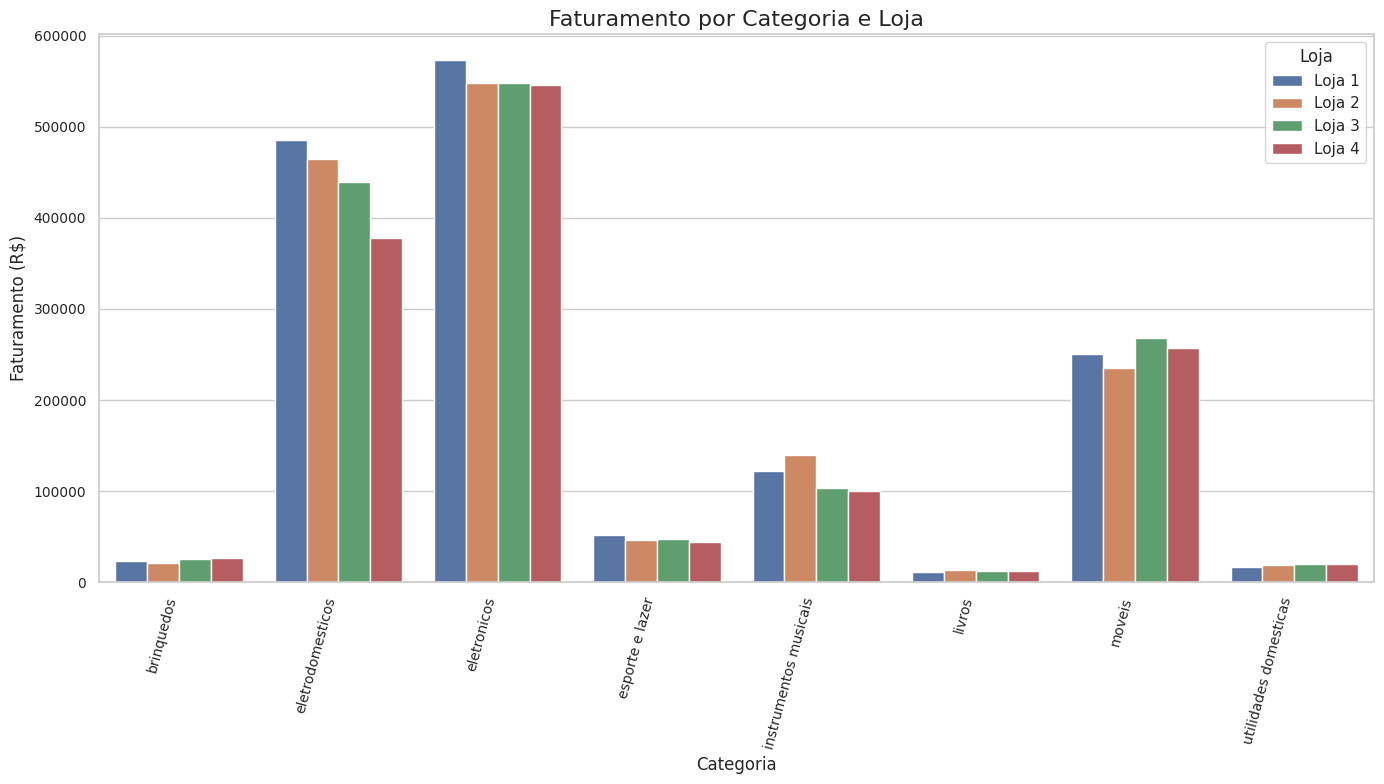

In [3]:
vendas_categoria = todas_lojas.groupby(["Categoria do Produto", "Loja"])["Preço"].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=vendas_categoria, x="Categoria do Produto", y="Preço", hue="Loja")

plt.title("Faturamento por Categoria e Loja", fontsize=16)
plt.xlabel("Categoria", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Loja")
plt.tight_layout()
plt.show()


In [4]:
avaliacoes = todas_lojas.groupby("Loja")["Avaliação da compra"].mean().round(2)

print("\nFaturamento por categoria e loja:")
for categoria, grupo in vendas_categoria.groupby("Categoria do Produto"):
    print(f"\nCategoria: {categoria}")
    for idx, linha in grupo.iterrows():
        print(f"  {linha['Loja']}: R$ {linha['Preço']:.2f}")



Faturamento por categoria e loja:

Categoria: brinquedos
  Loja 1: R$ 23993.78
  Loja 2: R$ 21262.21
  Loja 3: R$ 25869.20
  Loja 4: R$ 27015.67

Categoria: eletrodomesticos
  Loja 1: R$ 484913.36
  Loja 2: R$ 464758.13
  Loja 3: R$ 438984.89
  Loja 4: R$ 377680.65

Categoria: eletronicos
  Loja 1: R$ 572659.23
  Loja 2: R$ 547773.71
  Loja 3: R$ 547699.92
  Loja 4: R$ 545966.86

Categoria: esporte e lazer
  Loja 1: R$ 52387.55
  Loja 2: R$ 46326.09
  Loja 3: R$ 47456.10
  Loja 4: R$ 44465.65

Categoria: instrumentos musicais
  Loja 1: R$ 121731.69
  Loja 2: R$ 139987.03
  Loja 3: R$ 103174.45
  Loja 4: R$ 100136.50

Categoria: livros
  Loja 1: R$ 11713.92
  Loja 2: R$ 13454.35
  Loja 3: R$ 12664.70
  Loja 4: R$ 12427.77

Categoria: moveis
  Loja 1: R$ 250178.11
  Loja 2: R$ 235234.68
  Loja 3: R$ 268095.56
  Loja 4: R$ 256705.65

Categoria: utilidades domesticas
  Loja 1: R$ 16931.48
  Loja 2: R$ 19662.86
  Loja 3: R$ 20080.21
  Loja 4: R$ 20098.83


# 3. Média de Avaliação das Lojas

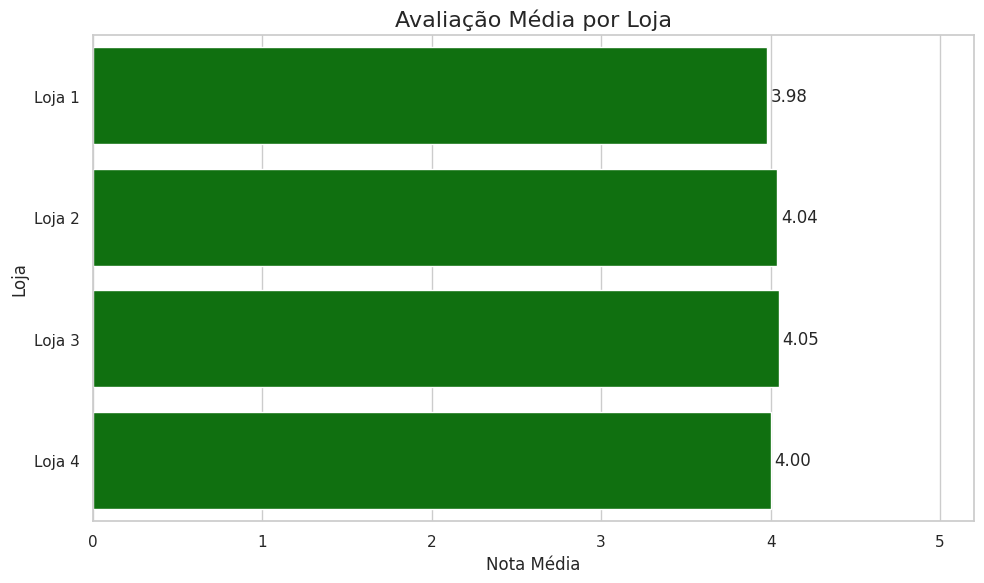


Avaliação média por loja:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


In [5]:
avaliacoes = todas_lojas.groupby("Loja")["Avaliação da compra"].mean().round(2)

plt.figure(figsize=(10, 6))
sns.barplot(x=avaliacoes.values, y=avaliacoes.index, color="green")

for i, valor in enumerate(avaliacoes.values):
    plt.text(valor + 0.02, i, f'{valor:.2f}', va='center', fontsize=12)

plt.title("Avaliação Média por Loja", fontsize=16)
plt.xlabel("Nota Média", fontsize=12)
plt.ylabel("Loja", fontsize=12)
plt.xlim(0, 5.2)
plt.tight_layout()
plt.show()

print("\nAvaliação média por loja:")
for loja, nota in avaliacoes.items():
    print(f"{loja}: {nota:.2f}")

# 4. Produtos Mais e Menos Vendidos

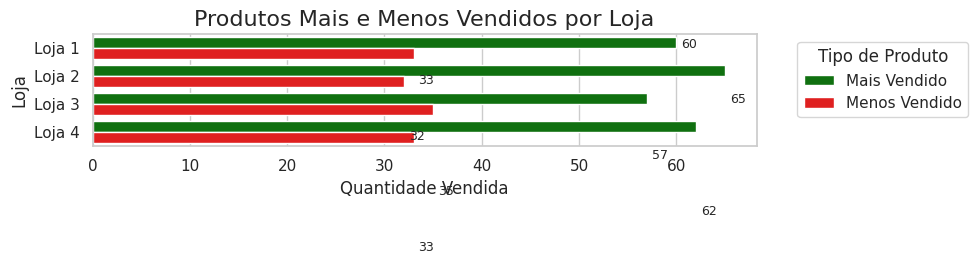


Produtos mais vendidos por loja:

Loja: Loja 1
 - Mais Vendido: Guarda roupas (60)
 - Menos Vendido: Celular ABXY (33)

Loja: Loja 2
 - Mais Vendido: Iniciando em programação (65)
 - Menos Vendido: Jogo de tabuleiro (32)

Loja: Loja 3
 - Mais Vendido: Kit banquetas (57)
 - Menos Vendido: Blocos de montar (35)

Loja: Loja 4
 - Mais Vendido: Cama box (62)
 - Menos Vendido: Guitarra (33)


In [14]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Criar a coluna "Quantidade" com valor 1 para contar vendas por produto
todas_lojas["Quantidade"] = 1

# Agrupar por loja e produto para contar quantas vezes cada produto foi vendido
agrupado = todas_lojas.groupby(['Loja', 'Produto'])['Quantidade'].sum().reset_index()

# Identificar o mais e o menos vendido por loja
mais_menos = agrupado.groupby('Loja').apply(
    lambda g: pd.DataFrame({
        'Produto': [
            g.loc[g['Quantidade'].idxmax(), 'Produto'],
            g.loc[g['Quantidade'].idxmin(), 'Produto']
        ],
        'Quantidade': [
            g['Quantidade'].max(),
            g['Quantidade'].min()
        ],
        'Tipo do Produto': ['Mais Vendido', 'Menos Vendido']
    })
).reset_index().drop('level_1', axis=1)

# GRÁFICO
plt.figure(figsize=(10, 6))
sns.barplot(
    data=mais_menos,
    x="Quantidade",
    y="Loja",
    hue="Tipo do Produto",
    palette={"Mais Vendido": "green", "Menos Vendido": "red"}
)

# Adicionar rótulos nas barras
deslocamento = {"Mais Vendido": -0.15, "Menos Vendido": 0.15}
for i, row in mais_menos.iterrows():
    tipo = row["Tipo do Produto"]
    plt.text(
        row["Quantidade"] + 0.5,
        i + deslocamento[tipo],
        str(row["Quantidade"]),
        va='center',
        fontsize=9
    )

plt.title("Produtos Mais e Menos Vendidos por Loja", fontsize=16)
plt.xlabel("Quantidade Vendida")
plt.ylabel("Loja")
plt.legend(title="Tipo de Produto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# IMPRESSÃO TEXTUAL
print("\nProdutos mais vendidos por loja:")
for loja, grupo in mais_menos.groupby("Loja"):
    print(f"\nLoja: {loja}")
    for _, row in grupo.iterrows():
        print(f" - {row['Tipo do Produto']}: {row['Produto']} ({row['Quantidade']})")


# 5. Frete Médio por Loja


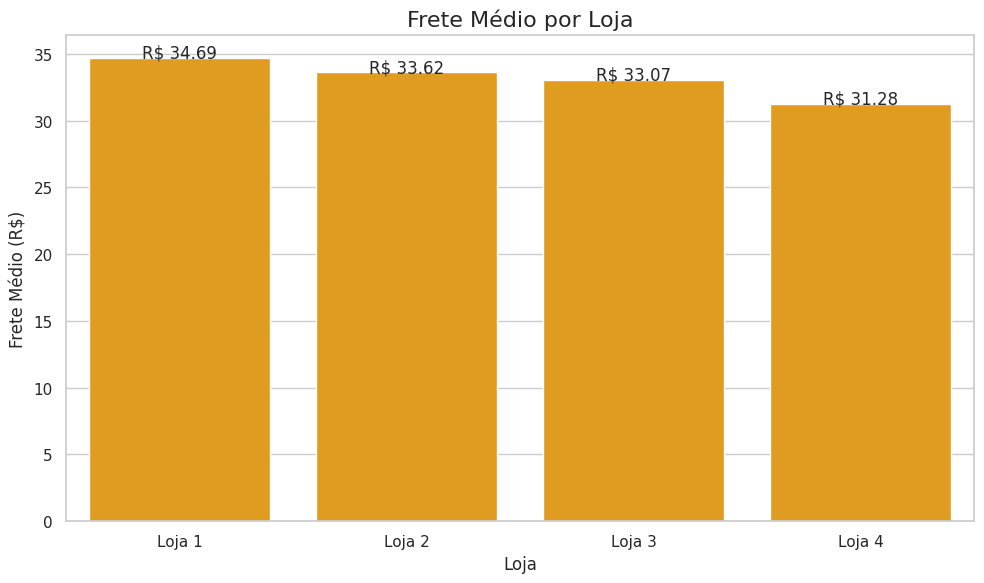


Frete médio por loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


In [15]:
frete_medio = todas_lojas.groupby("Loja")["Frete"].mean().round(2)

plt.figure(figsize=(10, 6))
sns.barplot(x=frete_medio.index, y=frete_medio.values, color="orange")

for i, v in enumerate(frete_medio.values):
    plt.text(i, v + 0.02, f'R$ {v:.2f}', ha='center')

plt.title("Frete Médio por Loja", fontsize=16)
plt.xlabel("Loja")
plt.ylabel("Frete Médio (R$)")
plt.tight_layout()
plt.show()

print("\nFrete médio por loja:")
for loja, frete in frete_medio.items():
    print(f"{loja}: R$ {frete:.2f}")


In [16]:
faturamento_lojas = todas_lojas.groupby("Loja")["Preço"].sum()
avaliacoes = todas_lojas.groupby("Loja")["Avaliação da compra"].mean().round(2)
frete_medio = todas_lojas.groupby("Loja")["Frete"].mean().round(2)

print("\n\nRELATÓRIO RESUMO:")
print("--------------------------")
print(f"Loja com menor faturamento: {faturamento_lojas.idxmin()} -> R$ {faturamento_lojas.min():,.2f}")
print(f"Loja com pior avaliação: {avaliacoes.idxmin()} -> Nota {avaliacoes.min():.2f}")
print(f"Loja com frete mais caro: {frete_medio.idxmax()} -> R$ {frete_medio.max():.2f}")




RELATÓRIO RESUMO:
--------------------------
Loja com menor faturamento: Loja 4 -> R$ 1,384,497.58
Loja com pior avaliação: Loja 1 -> Nota 3.98
Loja com frete mais caro: Loja 1 -> R$ 34.69
